In [1]:
import matplotlib
#matplotlib.use('Agg')
from path_data_variable import *
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')

In [4]:
ckd.row(0)

Row(Age=48, Blood Pressure=70, Specific Gravity=1.005, Albumin=4, Sugar=0, Red Blood Cells='normal', Pus Cell='abnormal', Pus Cell clumps='present', Bacteria='notpresent', Glucose=117, Blood Urea=56, Serum Creatinine=3.8, Sodium=111, Potassium=2.5, Hemoglobin=11.2, Packed Cell Volume=32, White Blood Cell Count=6700, Red Blood Cell Count=3.9, Hypertension='yes', Diabetes Mellitus='no', Coronary Artery Disease='no', Appetite='poor', Pedal Edema='yes', Anemia='yes', Class=1)

In [5]:
ckd.row(0).item(3)

4

In [6]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'Class', ckd.column('Class')
)

color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)
ckd

Class | Hemoglobin | Glucose     | Color
0     | 0.456884   | 0.133751    | gold
0     | 1.153      | -0.947597   | gold
0     | 0.770138   | -0.762223   | gold
0     | 0.596108   | -0.190654   | gold
0     | -0.239236  | -0.49961    | gold
0     | -0.0304002 | -0.159758   | gold
0     | 0.282854   | -0.00527964 | gold
0     | 0.108824   | -0.623193   | gold
0     | 0.0740178  | -0.515058   | gold
0     | 0.83975    | -0.422371   | gold
... (148 rows omitted)

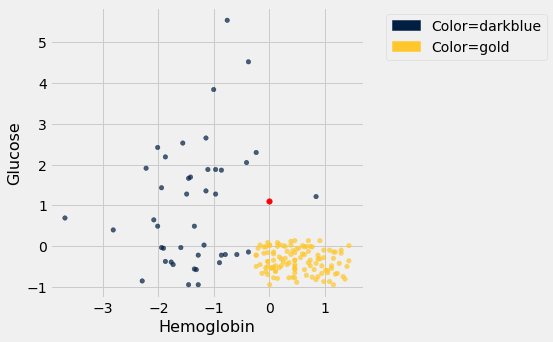

In [7]:
alice = make_array(0, 1.1)
ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plots.scatter(alice.item(0), alice.item(1), color='red', s=30);

In [8]:
ckd_attributes = ckd.select('Hemoglobin', 'Glucose')

In [9]:
ckd_attributes

Hemoglobin | Glucose
0.456884   | 0.133751
1.153      | -0.947597
0.770138   | -0.762223
0.596108   | -0.190654
-0.239236  | -0.49961
-0.0304002 | -0.159758
0.282854   | -0.00527964
0.108824   | -0.623193
0.0740178  | -0.515058
0.83975    | -0.422371
... (148 rows omitted)

In [10]:
ckd_attributes.row(3)

Row(Hemoglobin=0.5961076648232668, Glucose=-0.19065363034327712)

In [11]:
np.array(ckd_attributes.row(3))

array([ 0.59610766, -0.19065363])

In [12]:
patient3 = np.array(ckd_attributes.row(3))
alice, patient3

(array([0. , 1.1]), array([ 0.59610766, -0.19065363]))

In [13]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

1.421664918881847

In [14]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [15]:
distance(alice, patient3)

1.421664918881847

In [16]:
t = ckd_attributes.take(np.arange(5))
t

Hemoglobin | Glucose
0.456884   | 0.133751
1.153      | -0.947597
0.770138   | -0.762223
0.596108   | -0.190654
-0.239236  | -0.49961

In [17]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))

In [18]:
max_abs(t.row(4))

0.4996102825918697

In [19]:
t.apply(max_abs)

array([0.4568837 , 1.15300352, 0.77013762, 0.59610766, 0.49961028])

In [20]:
alice

array([0. , 1.1])

In [21]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [22]:
distance_from_alice(ckd_attributes.row(3))

1.421664918881847

In [23]:
distances = ckd_attributes.apply(distance_from_alice)
ckd_with_distances = ckd.with_column('Distance from Alice', distances)

In [24]:
ckd_with_distances

Class | Hemoglobin | Glucose     | Color | Distance from Alice
0     | 0.456884   | 0.133751    | gold  | 1.06882
0     | 1.153      | -0.947597   | gold  | 2.34991
0     | 0.770138   | -0.762223   | gold  | 2.01519
0     | 0.596108   | -0.190654   | gold  | 1.42166
0     | -0.239236  | -0.49961    | gold  | 1.6174
0     | -0.0304002 | -0.159758   | gold  | 1.26012
0     | 0.282854   | -0.00527964 | gold  | 1.1409
0     | 0.108824   | -0.623193   | gold  | 1.72663
0     | 0.0740178  | -0.515058   | gold  | 1.61675
0     | 0.83975    | -0.422371   | gold  | 1.73862
... (148 rows omitted)

In [25]:
sorted_by_distance = ckd_with_distances.sort('Distance from Alice')
sorted_by_distance

Class | Hemoglobin | Glucose   | Color    | Distance from Alice
1     | 0.83975    | 1.2151    | darkblue | 0.847601
1     | -0.970162  | 1.27689   | darkblue | 0.986156
0     | -0.0304002 | 0.0874074 | gold     | 1.01305
0     | 0.14363    | 0.0874074 | gold     | 1.02273
1     | -0.413266  | 2.04928   | darkblue | 1.03534
0     | 0.387272   | 0.118303  | gold     | 1.05532
0     | 0.456884   | 0.133751  | gold     | 1.06882
0     | 0.178436   | 0.0410639 | gold     | 1.07386
0     | 0.00440582 | 0.025616  | gold     | 1.07439
0     | -0.169624  | 0.025616  | gold     | 1.08769
... (148 rows omitted)

In [26]:
alice_5_nearest_neighbors = sorted_by_distance.take(np.arange(5))
alice_5_nearest_neighbors

Class | Hemoglobin | Glucose   | Color    | Distance from Alice
1     | 0.83975    | 1.2151    | darkblue | 0.847601
1     | -0.970162  | 1.27689   | darkblue | 0.986156
0     | -0.0304002 | 0.0874074 | gold     | 1.01305
0     | 0.14363    | 0.0874074 | gold     | 1.02273
1     | -0.413266  | 2.04928   | darkblue | 1.03534

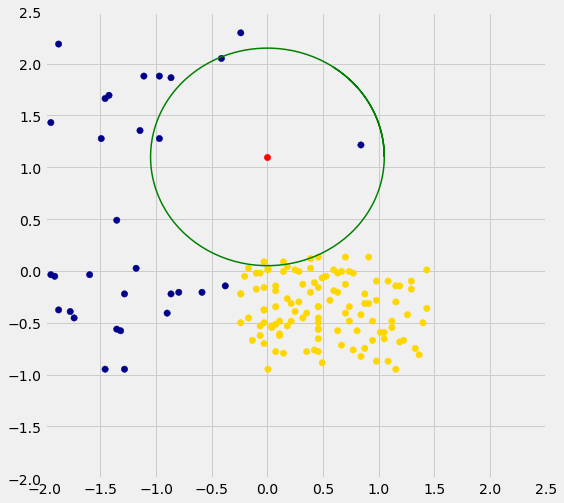

In [27]:
plots.figure(figsize=(8,8))
plots.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), s=40)
#ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plots.scatter(alice.item(0), alice.item(1), color='red', s=40)
radius = sorted_by_distance.column('Distance from Alice').item(4)+0.014
theta = np.arange(0, 2*np.pi+1, 2*np.pi/200)
plots.plot(radius*np.cos(theta)+alice.item(0), radius*np.sin(theta)+alice.item(1), color='g', lw=1.5);
plots.xlim(-2, 2.5)
plots.ylim(-2, 2.5);